In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [3]:
stat_df = pd.read_csv('statipy_results.csv')
stat_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


In [13]:
stat_df.keys()

Index(['Unnamed: 0', 'Track', 'Explicit', 'Tpopularity', 'Artist', 'Album',
       'Rdate'],
      dtype='object')

In [16]:
stat_df['Rdate'] = pd.to_datetime(stat_df['Rdate'])

In [17]:
stat_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


In [18]:
statipy_df = stat_df.drop('Unnamed: 0', axis=1)

In [39]:
statipy_df.groupby(['Artist', 'Rdate', 'Track'])[['Track']].describe()

Track  \
                                                                                      count   
Artist                  Rdate      Track                                                      
!!!                     2017-03-22 The One 2                                              2   
2Pac                    2014-11-07 California Love                                        1   
Aaron Copland           1960-01-01 Appalachian Spring: VII. Doppio movimento              1   
Adam Joseph             2017-05-03 Linda Evangelista (feat. Aja)                          1   
Adore Delano            2014-06-03 I Adore You                                            1   
Adrianne Lenker         2018-10-05 symbol                                                 1   
Agnes Obel              2013-01-01 September Song                                         1   
Ah-Mer-Ah-Su            2017-02-26 Meg Ryan                                               2   
Aja                     2017-02-02 Level Ya Pussy Up                                      1   
                        2017-04-21 C.L.A.T. (feat. DJ Mitch Ferrino)                      1   
                        2018-03-01 Finish Her!                                            1   
                        2018-05-07 Brujería                                               1   
                        2018-10-17 Demons Witches & Bitches                               1   
Al B. Sure!             1988-04-26 Nite and Day                                           1   
Alabama Shakes          2012-01-01 Hold On                                                1   
                        2015-04-21 Don't Wanna Fight                                      1   
                                   Sound & Color                                          1   
                                   This Feeling                                           1   
Alaska Thunderfuck      2015-06-23 This Is My Hair                                        1   
                                   Your Makeup Is Terrible                                1   
                        2016-10-14 Stun (feat. Gia Gunn)                                  1   
                                   The T (feat. Adore Delano)                             1   
Alban Berg              2012-01-01 Violin Concerto - 'To the Memory of an Angel': ...     1   
Alice Cooper            1972-01-01 School's Out                                           1   
Allen Toussaint         1975-01-01 Basic Lady - Remastered Version                        1   
Amadou & Mariam         2008-11-17 Djama                                                  2   
Amara La Negra          2018-02-20 What a Bam Bam                                         1   
Angel Haze              2012-01-01 Werkin' Girls                                          4   
Angel Olsen             2016-09-02 Give It Up                                             1   
Anita O'Day             1941-01-01 That's What You Think                                  1   
...                                                                                     ...   
Wilson Pickett          2017-11-24 You Left The Water Running - 2007 Remastered Ve...     1   
Wolfgang Amadeus Mozart 1995-11-01 Piano Concerto No. 21 in C Major, K. 467 "Elvir...     1   
                        2004-01-01 Le Nozze di Figaro, K. 492: Sinfonia                   1   
                        2006-06-05 Mozart / Arr Grieg: Piano Sonata No. 16 in C Ma...     1   
                        2011-02-08 Sonata No. 13 in B-Flat Major, K. 333: I. Allegro      1   
Wynona Carr             1993-01-01 Please Mr. Jailer                                      1   
Wynonie Harris          2014-04-19 Lovin' Machine - Remastered                            1   
XXXTENTACION            2018-10-25 Arms Around You (feat. Maluma & Swae Lee)              2   
Yeah Yeah Yeahs         2002-01-01 Miles Away                                             2   
 

In [40]:
statipy_df.groupby(['Artist', 'Rdate', 'Track'])[['Tpopularity']].describe()

Tpopularity  \
                                                                                            count   
Artist                  Rdate      Track                                                            
!!!                     2017-03-22 The One 2                                                  2.0   
2Pac                    2014-11-07 California Love                                            1.0   
Aaron Copland           1960-01-01 Appalachian Spring: VII. Doppio movimento                  1.0   
Adam Joseph             2017-05-03 Linda Evangelista (feat. Aja)                              1.0   
Adore Delano            2014-06-03 I Adore You                                                1.0   
Adrianne Lenker         2018-10-05 symbol                                                     1.0   
Agnes Obel              2013-01-01 September Song                                             1.0   
Ah-Mer-Ah-Su            2017-02-26 Meg Ryan                                                   2.0   
Aja                     2017-02-02 Level Ya Pussy Up                                          1.0   
                        2017-04-21 C.L.A.T. (feat. DJ Mitch Ferrino)                          1.0   
                        2018-03-01 Finish Her!                                                1.0   
                        2018-05-07 Brujería                                                   1.0   
                        2018-10-17 Demons Witches & Bitches                                   1.0   
Al B. Sure!             1988-04-26 Nite and Day                                               1.0   
Alabama Shakes          2012-01-01 Hold On                                                    1.0   
                        2015-04-21 Don't Wanna Fight                                          1.0   
                                   Sound & Color                                              1.0   
                                   This Feeling                                               1.0   
Alaska Thunderfuck      2015-06-23 This Is My Hair                                            1.0   
                                   Your Makeup Is Terrible                                    1.0   
                        2016-10-14 Stun (feat. Gia Gunn)                                      1.0   
                                   The T (feat. Adore Delano)                                 1.0   
Alban Berg              2012-01-01 Violin Concerto - 'To the Memory of an Angel': ...         1.0   
Alice Cooper            1972-01-01 School's Out                                               1.0   
Allen Toussaint         1975-01-01 Basic Lady - Remastered Version                            1.0   
Amadou & Mariam         2008-11-17 Djama                                                      2.0   
Amara La Negra          2018-02-20 What a Bam Bam                                             1.0   
Angel Haze              2012-01-01 Werkin' Girls                                              4.0   
Angel Olsen             2016-09-02 Give It Up                                                 1.0   
Anita O'Day             1941-01-01 That's What You Think                                      1.0   
...                                                                                           ...   
Wilson Pickett          2017-11-24 You Left The Water Running - 2007 Remastered Ve...         1.0   
Wolfgang Amadeus Mozart 1995-11-01 Piano Concerto No. 21 in C Major, K. 467 "Elvir...         1.0   
                        2004-01-01 Le Nozze di Figaro, K. 492: Sinfonia                       1.0   
                        2006-06-05 Mozart / Arr Grieg: Piano Sonata No. 16 in C Ma...         1.0   
                        2011-02-08 Sonata No. 13 in B-Flat Major, K. 333: I. Allegro          1.0   
Wynona Carr             1993-01-01 Please Mr. Jailer                                          1.0   
Wynonie Harris          2014-04-19 Lovin' Mach

In [41]:
statipy_df.groupby(['Artist', 'Rdate', 'Track'])[['Rdate']].describe()

Rdate  \
                                                                                      count   
Artist                  Rdate      Track                                                      
!!!                     2017-03-22 The One 2                                              2   
2Pac                    2014-11-07 California Love                                        1   
Aaron Copland           1960-01-01 Appalachian Spring: VII. Doppio movimento              1   
Adam Joseph             2017-05-03 Linda Evangelista (feat. Aja)                          1   
Adore Delano            2014-06-03 I Adore You                                            1   
Adrianne Lenker         2018-10-05 symbol                                                 1   
Agnes Obel              2013-01-01 September Song                                         1   
Ah-Mer-Ah-Su            2017-02-26 Meg Ryan                                               2   
Aja                     2017-02-02 Level Ya Pussy Up                                      1   
                        2017-04-21 C.L.A.T. (feat. DJ Mitch Ferrino)                      1   
                        2018-03-01 Finish Her!                                            1   
                        2018-05-07 Brujería                                               1   
                        2018-10-17 Demons Witches & Bitches                               1   
Al B. Sure!             1988-04-26 Nite and Day                                           1   
Alabama Shakes          2012-01-01 Hold On                                                1   
                        2015-04-21 Don't Wanna Fight                                      1   
                                   Sound & Color                                          1   
                                   This Feeling                                           1   
Alaska Thunderfuck      2015-06-23 This Is My Hair                                        1   
                                   Your Makeup Is Terrible                                1   
                        2016-10-14 Stun (feat. Gia Gunn)                                  1   
                                   The T (feat. Adore Delano)                             1   
Alban Berg              2012-01-01 Violin Concerto - 'To the Memory of an Angel': ...     1   
Alice Cooper            1972-01-01 School's Out                                           1   
Allen Toussaint         1975-01-01 Basic Lady - Remastered Version                        1   
Amadou & Mariam         2008-11-17 Djama                                                  2   
Amara La Negra          2018-02-20 What a Bam Bam                                         1   
Angel Haze              2012-01-01 Werkin' Girls                                          4   
Angel Olsen             2016-09-02 Give It Up                                             1   
Anita O'Day             1941-01-01 That's What You Think                                  1   
...                                                                                     ...   
Wilson Pickett          2017-11-24 You Left The Water Running - 2007 Remastered Ve...     1   
Wolfgang Amadeus Mozart 1995-11-01 Piano Concerto No. 21 in C Major, K. 467 "Elvir...     1   
                        2004-01-01 Le Nozze di Figaro, K. 492: Sinfonia                   1   
                        2006-06-05 Mozart / Arr Grieg: Piano Sonata No. 16 in C Ma...     1   
                        2011-02-08 Sonata No. 13 in B-Flat Major, K. 333: I. Allegro      1   
Wynona Carr             1993-01-01 Please Mr. Jailer                                      1   
Wynonie Harris          2014-04-19 Lovin' Machine - Remastered                            1   
XXXTENTACION            2018-10-25 Arms Around You (feat. Maluma & Swae Lee)              2   
Yeah Yeah Yeahs         2002-01-01 Miles Away                                             2   
 

In [120]:
singles = statipy_df.groupby('Track').filter(lambda x: x['Track'].count()<=1)
artist_singles = singles.groupby(['Artist'])[['Track']]

In [134]:
artist_singles.groups

{'2Pac': Int64Index([978], dtype='int64'),
 'Aaron Copland': Int64Index([408], dtype='int64'),
 'Adam Joseph': Int64Index([29], dtype='int64'),
 'Adore Delano': Int64Index([40], dtype='int64'),
 'Adrianne Lenker': Int64Index([289], dtype='int64'),
 'Agnes Obel': Int64Index([955], dtype='int64'),
 'Aja': Int64Index([7, 14, 22, 31, 39], dtype='int64'),
 'Al B. Sure!': Int64Index([613], dtype='int64'),
 'Alabama Shakes': Int64Index([517, 519, 522], dtype='int64'),
 'Alaska Thunderfuck': Int64Index([21, 30, 42, 46], dtype='int64'),
 'Alban Berg': Int64Index([413], dtype='int64'),
 'Alice Cooper': Int64Index([209], dtype='int64'),
 'Allen Toussaint': Int64Index([142], dtype='int64'),
 'Amara La Negra': Int64Index([883], dtype='int64'),
 'Angel Olsen': Int64Index([285], dtype='int64'),
 "Anita O'Day": Int64Index([338, 341, 375, 388], dtype='int64'),
 'Antonio Vivaldi': Int64Index([396, 425], dtype='int64'),
 'Aquaria': Int64Index([41], dtype='int64'),
 'Aretha Franklin': Int64Index([205], dt

In [135]:
singles['freq'] = singles.groupby('Artist')['Track'].transform('count')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
artfreq = singles.groupby(['freq', 'Artist'])[['freq']].count()

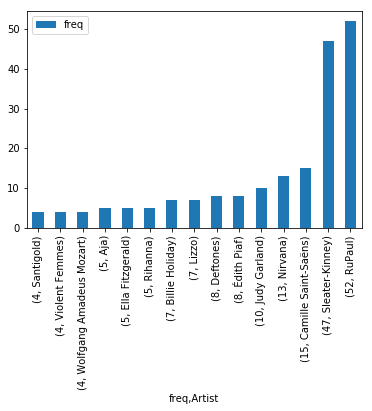

In [205]:
artfreq.tail(15).plot.bar()

In [206]:
singles.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,freq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1


In [207]:
popsingles = singles[singles['Tpopularity']>=43]

In [209]:
popsingles['freq'].mean()

5.709779179810726

In [210]:
freqpopsing = popsingles[popsingles['freq']>=5]

In [242]:
avgartistsingles = freqpopsing.groupby(['Artist'])[['Artist', 'Tpopularity', 'freq']].mean()

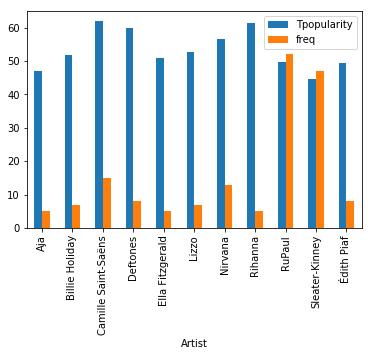

In [245]:
avgartistsingles.plot.bar()

In [254]:
all_songs = statipy_df.groupby('Track').filter(lambda x: x['Track'].count()>=2)
all_songs

,Track,Explicit,Tpopularity,Artist,Album,Rdate
5,Wat U Mean,True,42,Lizzo,Lizzobangers,2014-05-20
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24
12,Soak It Up (Remix),True,44,Monét X Change,Soak It Up,2018-05-25
13,Pay Me,False,41,Shangela Laquifa,Pay Me,2018-03-15
16,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,False,63,RuPaul,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,2018-03-16
19,Call Me Mother,True,64,RuPaul,American,2017-03-24
25,Now or Never,False,42,Blair St. Clair,Call My Life,2018-06-29
28,Read U Wrote U (Ellis Miah Mix) [feat. The Cas...,True,61,RuPaul,Read U Wrote U (Ellis Miah Mix) [feat. The Cas...,2016-10-12
43,Glamazon,False,57,RuPaul,Glamazon,2011-05-03
54,Tempo (feat. Missy Elliott),True,73,Lizzo,Tempo (feat. Missy Elliott),2019-03-20


In [255]:
all_songs['freq'] = all_songs.groupby('Artist')['Track'].transform('count')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
allartfreq = all_songs.groupby(['freq', 'Artist'])[['freq']].count()

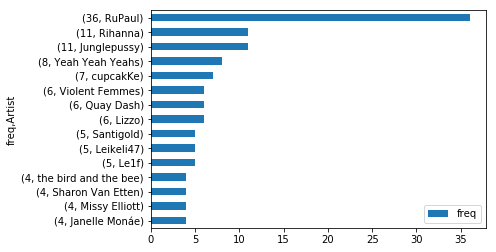

In [259]:
allartfreq.tail(15).plot.barh()

In [262]:
all_songs.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,freq
5,Wat U Mean,True,42,Lizzo,Lizzobangers,2014-05-20,6
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24,36
12,Soak It Up (Remix),True,44,Monét X Change,Soak It Up,2018-05-25,2
13,Pay Me,False,41,Shangela Laquifa,Pay Me,2018-03-15,2
16,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,False,63,RuPaul,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,2018-03-16,36


In [263]:
most_popular = all_songs[all_songs['Tpopularity']>=43]

In [277]:
most_popular['freq'].mean()

7.018867924528302

In [274]:
most_popular

,Track,Explicit,Tpopularity,Artist,Album,Rdate,freq
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24,36
12,Soak It Up (Remix),True,44,Monét X Change,Soak It Up,2018-05-25,2
16,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,False,63,RuPaul,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,2018-03-16,36
19,Call Me Mother,True,64,RuPaul,American,2017-03-24,36
28,Read U Wrote U (Ellis Miah Mix) [feat. The Cas...,True,61,RuPaul,Read U Wrote U (Ellis Miah Mix) [feat. The Cas...,2016-10-12,36
43,Glamazon,False,57,RuPaul,Glamazon,2011-05-03,36
54,Tempo (feat. Missy Elliott),True,73,Lizzo,Tempo (feat. Missy Elliott),2019-03-20,6
58,Pussy Is God,True,70,King Princess,Pussy Is God,2018-11-02,2
121,The Beginning,False,51,RuPaul,Glamazon,2011-05-03,36
122,Peanut Butter (feat. Big Freedia),False,50,RuPaul,Peanut Butter (feat. Big Freedia),2012-06-05,36


In [288]:
mostfreq_pop = most_popular[most_popular['freq']>=6]

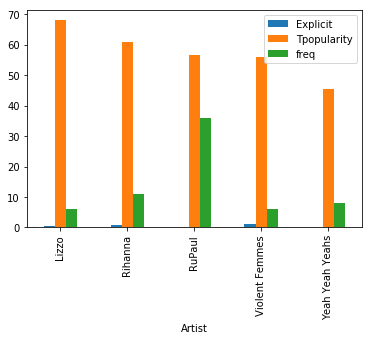

In [305]:
mostfreq_pop.groupby('Artist').mean().plot.bar()

In [311]:
avgartistsongs = mostfreq_pop.groupby(['Artist'])[['Artist', 'Tpopularity', 'freq']].mean()

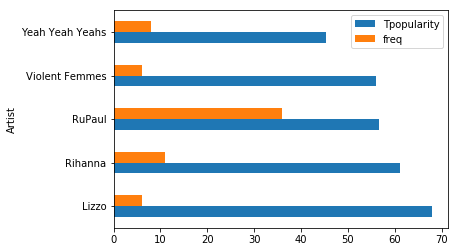

In [320]:
avgartistsongs.plot.barh()

In [325]:
explicit_tracks = all_songs[all_songs['Explicit']==True]

In [333]:
explicit_tracks['freq'].mean()

5.481203007518797

In [335]:
freqex_tracks = explicit_tracks[explicit_tracks['freq']>=6]

In [364]:
top_freqartex = freqex_tracks.groupby('Artist')[['Tpopularity', 'freq']].mean()

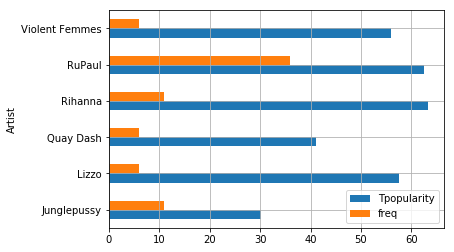

In [366]:
top_freqartex.plot.barh(grid=True)

In [367]:
pg_tracks = all_songs[all_songs['Explicit']==False]

In [368]:
pg_tracks['freq'].mean()

7.2122448979591836

In [372]:
freqpg_tracks = pg_tracks[pg_tracks['freq']>=7]

In [373]:
top_freqartpg = freqpg_tracks.groupby('Artist')[['Tpopularity', 'freq']].mean()

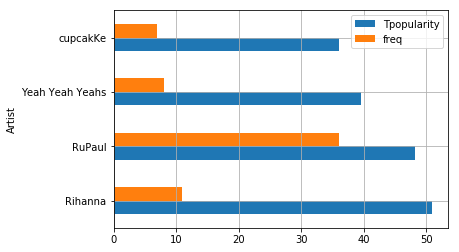

In [374]:
top_freqartpg.plot.barh(grid=True)

In [376]:
pgpop_tracks = pg_tracks[pg_tracks['Tpopularity']>=43]

In [432]:
pg_art_info = pgpop_tracks.groupby(['Artist', 'freq'])[['Tpopularity']]

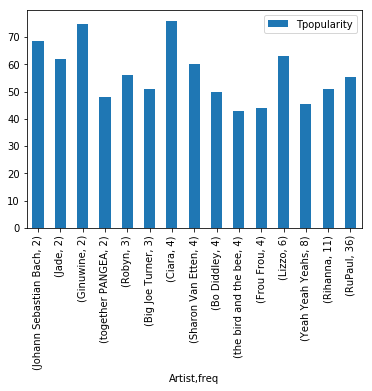

In [464]:
pg_art_info.mean().sort_values('freq').tail(15).plot.bar()

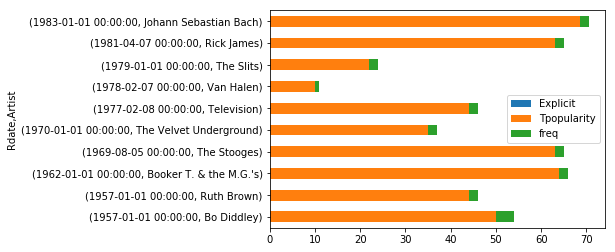

In [498]:
eldest_tracks = all_songs.groupby(['Rdate', 'Artist']).mean().head(10)
eldest_tracks.plot(kind='barh',stacked=True)

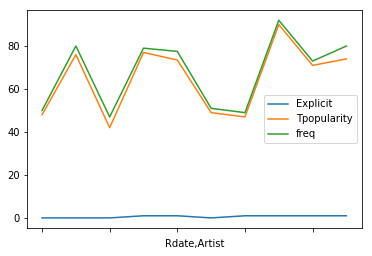

In [500]:
newest_tracks = all_songs.groupby(['Rdate', 'Artist']).mean().tail(10)
newest_tracks.plot(kind='line',stacked=True)

In [508]:
all_songs['Artist'].value_counts()

RuPaul                    36
Rihanna                   11
Junglepussy               11
Yeah Yeah Yeahs            8
cupcakKe                   7
Lizzo                      6
Violent Femmes             6
Quay Dash                  6
Santigold                  5
Le1f                       5
Leikeli47                  5
Missy Elliott              4
Janelle Monáe              4
Ariana Grande              4
Ciara                      4
the bird and the bee       4
Bo Diddley                 4
Drake                      4
Frou Frou                  4
Angel Haze                 4
Sharon Van Etten           4
Chynna                     3
Todrick Hall               3
The Weeknd                 3
Grace Jones                3
Red Tracy                  3
Big Joe Turner             3
Robyn                      3
Azealia Banks              3
Marshmello                 3
                          ..
Booker T. & the M.G.'s     2
Slick Rick                 2
Demi Lovato                2
Cardi B       

In [509]:
statipy_df

,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17
5,Wat U Mean,True,42,Lizzo,Lizzobangers,2014-05-20
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27
9,Bring It! - Tim Letteer Radio Edit,False,26,Manila Luzon,"Bring It!, Remixes, Pt. 1",2014-01-17


In [510]:
statipy_df['freq'] = statipy_df.groupby('Artist')['Track'].transform('count')

In [526]:
statipy_df.groupby(['Artist', 'freq']).mean()

,,Explicit,Tpopularity
Artist,freq,,
!!!,2,0.000000,38.000000
2Pac,1,1.000000,43.000000
Aaron Copland,1,0.000000,50.000000
Adam Joseph,1,0.000000,40.000000
Adore Delano,1,1.000000,49.000000
Adrianne Lenker,1,0.000000,58.000000
Agnes Obel,1,0.000000,53.000000
Ah-Mer-Ah-Su,2,0.000000,5.000000
Aja,5,0.800000,45.000000


In [530]:
statipy_df['Tpopularity'].mean()

43.71241170534813

In [528]:
statipy_highpop = statipy_df[statipy_df['Tpopularity']>=43]

In [529]:
statipy_highpop

,Track,Explicit,Tpopularity,Artist,Album,Rdate,freq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24,88
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02,5
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27,1
10,DRAG UP YOUR LIFE,False,48,RuPaul,DRAG UP YOUR LIFE,2018-03-02,88
11,1999,False,82,Charli XCX,1999,2018-10-05,2
12,Soak It Up (Remix),True,44,Monét X Change,Soak It Up,2018-05-25,2
16,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,False,63,RuPaul,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,2018-03-16,88
17,Trophy,True,48,Charli XCX,Vroom Vroom EP,2016-02-26,2


In [537]:
statipy_highpop.groupby(['Artist', 'Tpopularity']).mean()

Explicit  freq
Artist                  Tpopularity                
2Pac                    43                1.0     1
Aaron Copland           50                0.0     1
Adore Delano            49                1.0     1
Adrianne Lenker         58                0.0     1
Agnes Obel              53                0.0     1
Aja                     45                1.0     5
                        47                1.0     5
                        49                0.0     5
Al B. Sure!             53                0.0     1
Alabama Shakes          44                0.0     4
                        45                0.0     4
                        52                0.0     4
Alaska Thunderfuck      43                0.0     4
                        46                1.0     4
                        50                0.5     4
Alban Berg              45                0.0     1
Alice Cooper            66                0.0     1
Amara La Negra          46                0.0     1
Angel Haze              52                1.0     4
Angel Olsen             50                0.0     1
Anita O'Day             44                0.0     4
                        45                0.0     4
                        48                0.0     4
                        57                0.0     4
Antonio Vivaldi         63                0.0     2
Aretha Franklin         73                0.0     1
Ariana Grande           69                1.0     6
                        76                1.0     6
                        88                1.0     6
                        89                0.0     6
...                                       ...   ...
Too $hort               57                1.0     1
Trixie Mattel           46                0.0     1
Twenty One Pilots       83                0.0     2
UGK                     55                1.0     1
Vanessa Vanjie Mateo    43                1.0     1
Vic Damone              45                0.0     2
                        58                0.0     2
Violent Femmes          51                0.0    10
                        54                0.0    10
                        56                1.0    10
                        70                0.0    10
Voyage                  49                0.0     1
Warpaint                56                0.0     2
Ween                    43                0.0     1
Whitney Houston         55                0.0     2
                        60                0.0     2
Wolfgang Amadeus Mozart 48                0.0     4
                        62                0.0     4
                        64                0.0     4
                        68                0.0     4
XXXTENTACION            89                1.0     2
Yeah Yeah Yeahs         43                0.0    11
                        50                0.0    11
                        55                0.0    11
alt-J                   58                0.0     2
the bird and the bee    43                0.0     4
together PANGEA         48                0.0     2
Édith Piaf              45                0.0     8
                        48                0.0     8
                        55                0.0     8

[395 rows x 2 columns]